# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
Observations:
1. The correlation between mouse weight and average tumor volume is 0.84 which means that there is a strong and positive correlation between those two variables.
2. There are 248 mice in the clean data frame
3. Capomulin and Ramicane have the most mice observed in the data
4. There are more male mice in the data 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df = pd.merge(mouse_metadata, study_results, how='outer', on ="Mouse ID")

# Display the data table for preview
combine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice= combine_df["Mouse ID"].nunique()
mice

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= combine_df.loc[combine_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data= combine_df.loc[combine_df['Mouse ID'] == 'g989', :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combine_df[combine_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice in the clean DataFrame.
mice_clean_data = clean_data['Mouse ID'].nunique()

mice_clean_data

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary_statistics



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of observed mice timepoints')

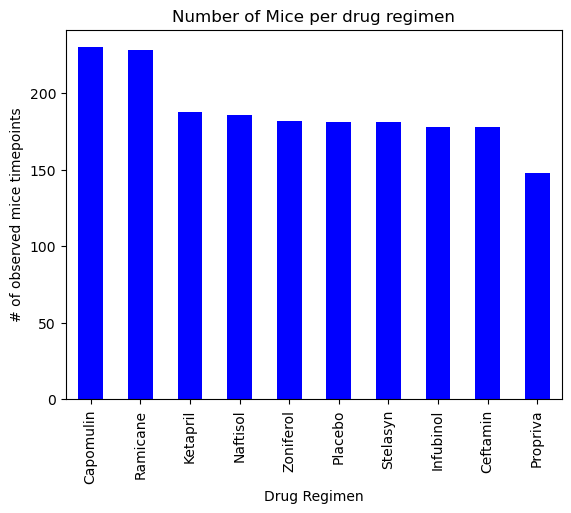

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = clean_data['Drug Regimen'].value_counts()

plot_bar = total_rows.plot.bar(color='blue')

plt.title("Number of Mice per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mice timepoints")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

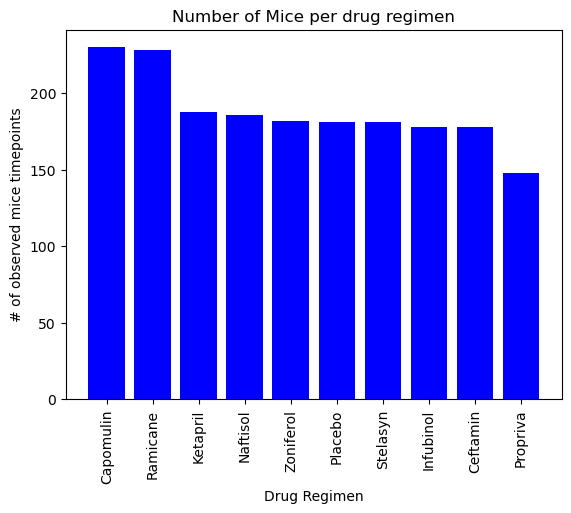

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_ax = total_rows.index.values
y_ax = total_rows.values

plt.bar(x_ax, y_ax, color= 'blue', alpha=1, align= 'center')

plt.title("Number of Mice per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mice timepoints")
plt.xticks(rotation='vertical')


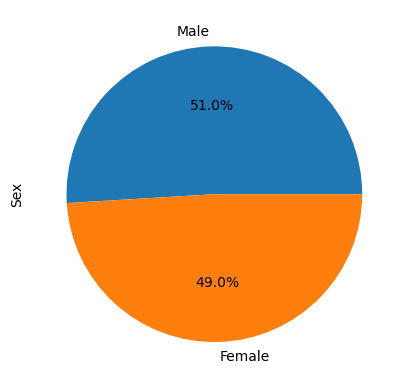

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data["Sex"].value_counts()
gender.plot.pie(autopct= "%1.1f%%")
plt.show()

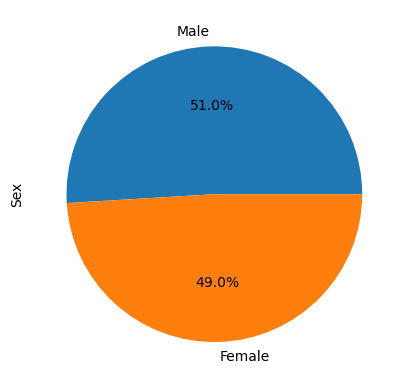

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49, 51]
plot = gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
ramicane = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
infubinol = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
ceftamin = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse

capomulin_last = capomulin.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")

ramicane_last = ramicane.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")

infubinol_last = infubinol.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")

ceftamin_last = ceftamin.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



In [37]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
tumor_capomulin = capomulin_merge["Tumor Volume (mm3)"]
quartiles_capomulin = tumor_capomulin.quantile([.25,.5,.75])
lowerquantile_capomulin = quartiles_capomulin[0.25]
upperquantile_capumilin = quartiles_capomulin[0.75]
iqr_capomulin = upperquantile_capumilin-lowerquantile_capomulin

lower_bound_capomulin = lowerquantile_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperquantile_capumilin + (1.5*iqr_capomulin)
print(f'Capomulin potential outliers could be values below {lower_bound_capomulin} and above {upper_bound_capomulin} could be outliers.')

tumor_ramicane = ramicane_merge["Tumor Volume (mm3)"]
quartiles_ramicane = tumor_ramicane.quantile([.25,.5,.75])
lowerquantile_ramicane = quartiles_ramicane[0.25]
upperquantile_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperquantile_ramicane-lowerquantile_ramicane

lower_bound_ramicane = lowerquantile_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperquantile_ramicane + (1.5*iqr_ramicane)
print(f'Ramicane potential outliers could be values below {lower_bound_ramicane} and above {upper_bound_ramicane} could be outliers.')

tumor_infubinol = infubinol_merge["Tumor Volume (mm3)"]
quartiles_infubinol = tumor_infubinol.quantile([.25,.5,.75])
lowerquantile_infubinol = quartiles_infubinol[0.25]
upperquantile_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperquantile_infubinol-lowerquantile_infubinol

lower_bound_infubinol = lowerquantile_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperquantile_infubinol + (1.5*iqr_infubinol)
print(f'Infubinol potential outliers could be values below {lower_bound_infubinol} and above {upper_bound_infubinol} could be outliers.')


tumor_ceftamin = ceftamin_merge["Tumor Volume (mm3)"]
quartiles_ceftamin = tumor_ceftamin.quantile([.25,.5,.75])
lowerquantile_ceftamin = quartiles_ceftamin[0.25]
upperquantile_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperquantile_ceftamin-lowerquantile_ceftamin

lower_bound_ceftamin = lowerquantile_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperquantile_ceftamin + (1.5*iqr_ceftamin)
print(f'Ceftamin potential outliers could be values below {lower_bound_ceftamin} and above {upper_bound_ceftamin} could be outliers.')


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


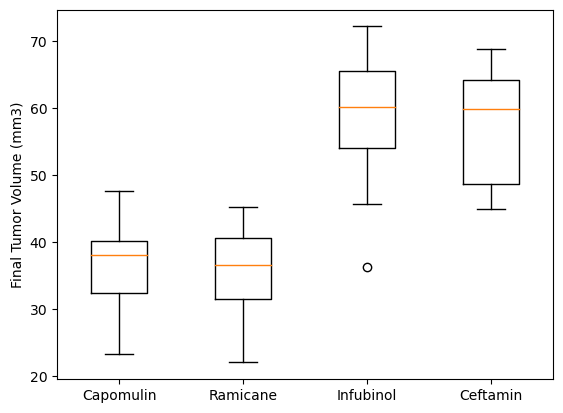

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = [tumor_capomulin, tumor_ramicane, tumor_infubinol, tumor_ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(box_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])

plt.show()

## Line and Scatter Plots

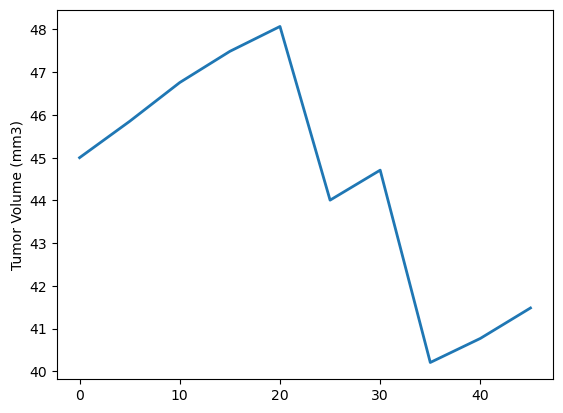

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_2 = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]

capomulin_new = capomulin_2.loc[capomulin_2['Mouse ID']=='l509',: ]


x_axis = capomulin_new["Timepoint"]
y_axis = capomulin_new["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.ylabel('Tumor Volume (mm3)')

plt.show()



/var/folders/rv/pm07630j71bdtzq8ysh5tpb40000gn/T/ipykernel_2134/133162361.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_scatter = capomulin_2.groupby(['Mouse ID']).mean()


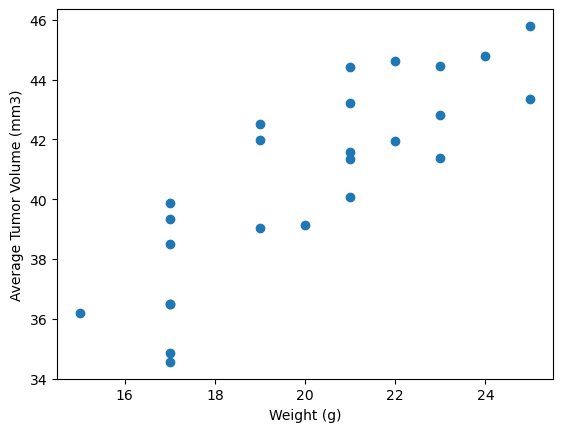

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_scatter = capomulin_2.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_scatter['Weight (g)'],capomulin_scatter['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)


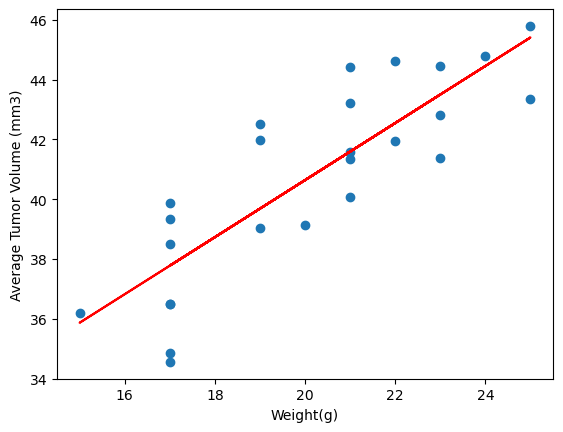

In [81]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corre_model=round(st.pearsonr(capomulin_scatter['Weight (g)'],capomulin_scatter['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corre_model}")

regres_model=st.linregress(capomulin_scatter['Weight (g)'],capomulin_scatter['Tumor Volume (mm3)'])
print(regres_model)

slope = 0.9544396890241045
b = 21.552160532685015

y_axis2 = capomulin_scatter['Weight (g)']*slope+b
plt.scatter(capomulin_scatter['Weight (g)'],capomulin_scatter['Tumor Volume (mm3)'])
plt.plot(capomulin_scatter['Weight (g)'],y_axis2,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()